<a href="https://colab.research.google.com/github/spandana1320/Data-mining/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]  # Taking Petal Length and Petal Width (modified)
y = (iris.target != 0) * 1  # Binary classification (1 if not setosa)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear', penalty='l1')  # Modified parameters
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Save to CSV (simulating what you'd get from an external file)
df.to_csv('breast_cancer.csv', index=False)

Accuracy: 0.90
Confusion Matrix:
 [[36  7]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



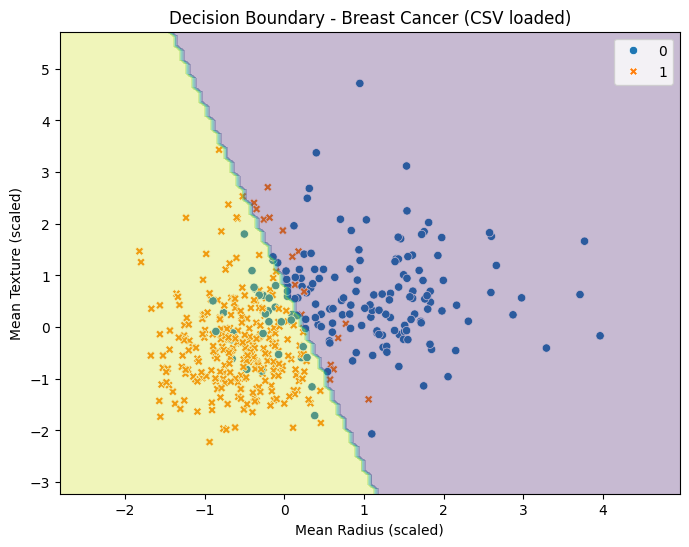

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('breast_cancer.csv')
df = df[['mean radius', 'mean texture', 'target']]
X = df[['mean radius', 'mean texture']].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train)
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.xlabel('Mean Radius (scaled)')
plt.ylabel('Mean Texture (scaled)')
plt.title('Decision Boundary - Breast Cancer (CSV loaded)')
plt.show()

Modified Accuracy: 0.91
Modified Confusion Matrix:
 [[37  6]
 [ 4 67]]
Modified Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



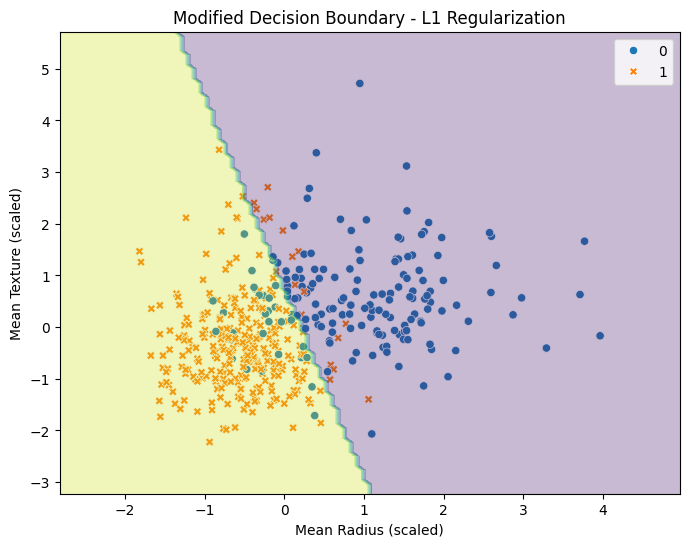

In [5]:
model_mod = LogisticRegression(solver='liblinear', penalty='l1')
model_mod.fit(X_train, y_train)
y_pred_mod = model_mod.predict(X_test)
accuracy_mod = accuracy_score(y_test, y_pred_mod)
conf_matrix_mod = confusion_matrix(y_test, y_pred_mod)
report_mod = classification_report(y_test, y_pred_mod)

print(f"Modified Accuracy: {accuracy_mod:.2f}")
print("Modified Confusion Matrix:\n", conf_matrix_mod)
print("Modified Classification Report:\n", report_mod)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train)
Z_mod = model_mod.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z_mod, alpha=0.3)
plt.xlabel('Mean Radius (scaled)')
plt.ylabel('Mean Texture (scaled)')
plt.title('Modified Decision Boundary - L1 Regularization')
plt.show()